# Bank-Marketing-Prediction

In [420]:
# import all necessary libraries
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split

# model metrics 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# import models

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Get the data

In [421]:
# load the data with a delimiter = ;
df = pd.read_csv('dataset/bank-full.csv', delimiter=';')

In [422]:
# get a headup of the data
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [423]:
df.shape

(45211, 17)

In [424]:
# get a description of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [425]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

# Explore and visualize the data 

In [426]:
# create an additional dataframe that holds features upon exploration
df_features = pd.DataFrame()

In [427]:
# check the datatypes of our features
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [428]:
# describe our numerical data
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [429]:
# describe our categorical data
df.describe(include=['O'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [430]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

**Target variable: y**

In [431]:
# used to convert columns with values (no, yes) into numerical values of (0, 1)
def yes_no_encoder(data):
    if 'no' in data:
        data = 0
    elif 'yes' in data:
        data = 1
    
    return data

In [432]:
# convert our categorical target to numeric
df['y'] = df['y'].apply(yes_no_encoder)

In [433]:
df_features['y'] = df['y']

0    0.883015
1    0.116985
Name: y, dtype: float64


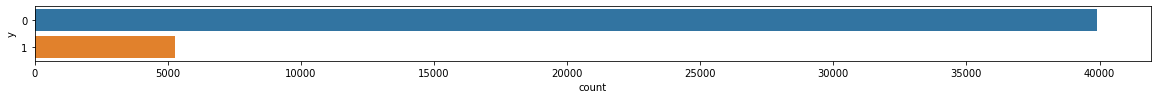

In [434]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='y', data=df)
print(df.y.value_counts(normalize=True))

**Feature: Age**

In [435]:
df_features['age'] = df['age']

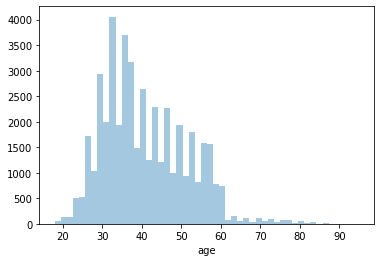

In [436]:
sns.distplot(df_features['age'], kde=False)

**Feature: Job**

In [437]:
df_features['job'] = df['job']

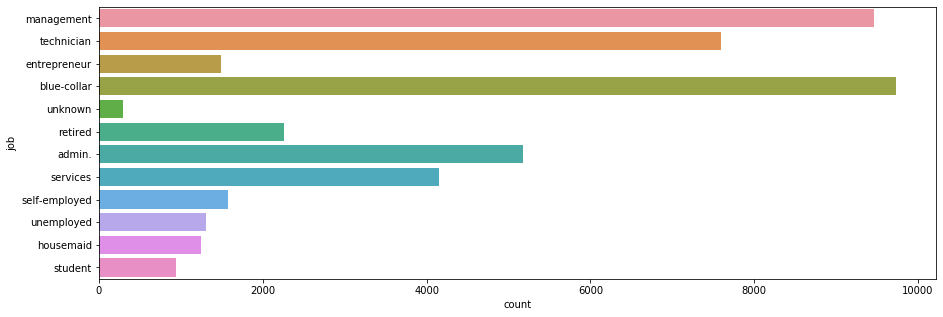

In [438]:
plt.figure(figsize=(15, 5))
sns.countplot(y='job', data=df_features)

**Feature: marital**

In [439]:
df_features['marital'] = df['marital']

In [440]:
# returns percentage distribution of all categorical items in a specified column
def value_perc(feature):
    perc = feature.value_counts(normalize=True).reset_index()
    perc.columns = ['value', 'perc']
    perc['perc'] = round( perc['perc'] * 100 , 2)
    return perc

      value   perc
0   married  60.19
1    single  28.29
2  divorced  11.52


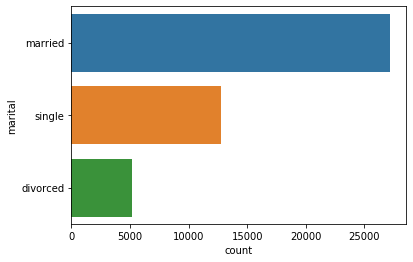

In [441]:
sns.countplot(y='marital', data=df_features)
print(value_perc(df_features.marital))

**Feature: Education**

In [442]:
df_features['education'] = df['education']

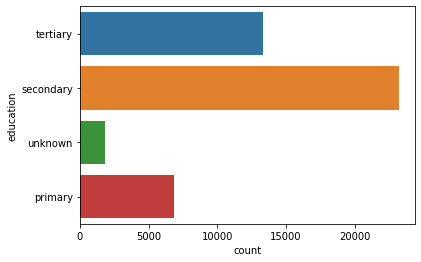

In [443]:
sns.countplot(y='education', data=df_features)

**Feature: default**

In [444]:
df_features['default'] = df['default']

In [445]:
# conver categorical default values to numeric values
df_features['default'] = df_features['default'].apply(yes_no_encoder)

  value  perc
0    no  98.2
1   yes   1.8


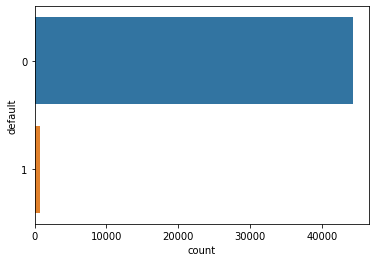

In [446]:
sns.countplot(y='default', data=df_features)
print(value_perc(df['default']))

**Feature: Balance**

In [447]:
df_features['balance'] = df['balance']

The mean balance:  1362.27
The mean balance:  3044.77


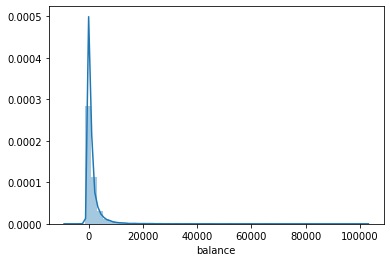

In [448]:
sns.distplot(df_features['balance'])
print("The mean balance: ", round(df_features['balance'].mean(), 2))
print("The mean balance: ", round(df_features['balance'].std(), 2))

In [449]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

**Feature: Housing**

In [450]:
df_features['housing'] = df['housing']

In [451]:
df_features['housing'] = df_features['housing'].apply(yes_no_encoder) # convert yes/no to numeric equivalent

  value   perc
0   yes  55.58
1    no  44.42


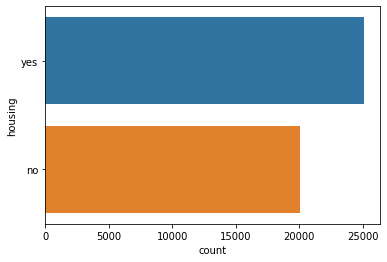

In [452]:
sns.countplot(y='housing', data=df)
print(value_perc(df['housing']))

**Feature: Loan**

In [453]:
df_features['loan'] = df['loan']

In [454]:
df_features['loan'] = df_features['loan'].apply(yes_no_encoder)

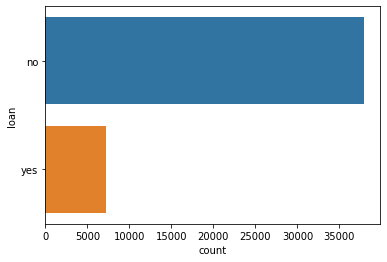

In [455]:
sns.countplot(y='loan', data=df)

**Feature: Contract**

In [456]:
df_features['contact'] = df['contact']

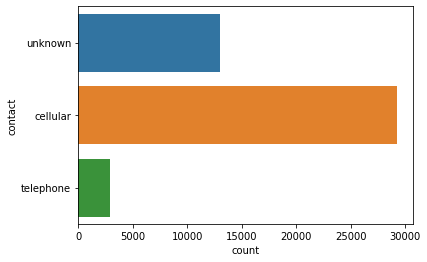

In [457]:
sns.countplot(y='contact', data=df_features)

**Feature: Day**

In [458]:
df_features['day'] = df['day']

Mean number of day:  15.80641879188693
Mean number of day:  8.322476153044592


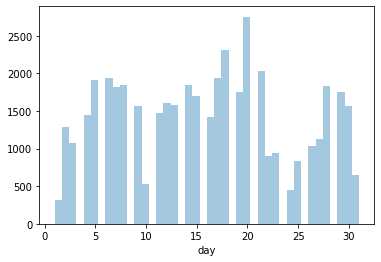

In [459]:
sns.distplot(df_features['day'], kde=False)
print("Mean number of day: ", df_features['day'].mean())
print("Mean number of day: ", df_features['day'].std())

**Feature: month**

In [460]:
df_features['month'] = df['month']

   value   perc
0    may  30.45
1    jul  15.25
2    aug  13.82
3    jun  11.81
4    nov   8.78
5    apr   6.49
6    feb   5.86
7    jan   3.10
8    oct   1.63
9    sep   1.28
10   mar   1.06
11   dec   0.47


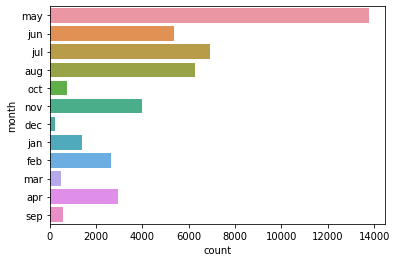

In [461]:
sns.countplot(y='month', data=df_features)
print(value_perc(df_features['month']))

**Feature: Duration**

In [462]:
df_features['duration'] = df['duration']

Mean duration:  258.1630797814691
Std.Dev duration:  257.5278122651719


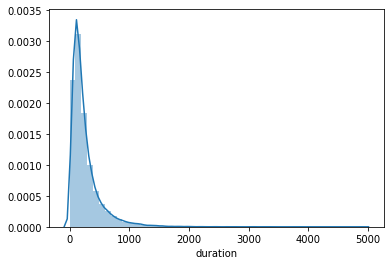

In [463]:
sns.distplot(df_features['duration'])
print("Mean duration: ", df_features['duration'].mean())
print("Std.Dev duration: ", df_features['duration'].std())

**Feature: Campaign**

In [464]:
df_features['campaign'] = df['campaign']

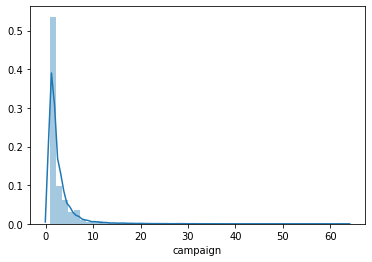

In [465]:
sns.distplot(df_features['campaign'])

**Feature: Pdays**

In [466]:
df_features['pdays'] = df['pdays']

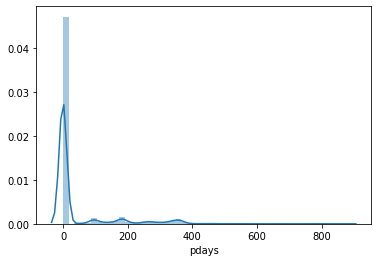

In [467]:
sns.distplot(df_features['pdays'])

**Feature: Previous**

In [468]:
df_features['previous'] = df['previous']

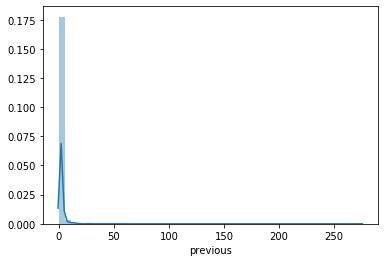

In [469]:
sns.distplot(df_features['previous'])

**Feature: Poutcome**

In [470]:
df_features['poutcome']=  df['poutcome']

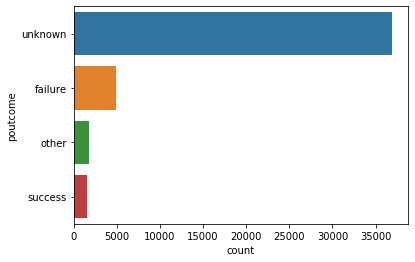

In [471]:
sns.countplot(y='poutcome', data=df_features)

In [472]:
# check for missing values
def missing_values(data):
    return data.isnull().sum()

missing_values(df_features)

y            0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Prepare the data

**Feature encoding**

In [473]:
# get all categorical feature
obj_cols = df_features.select_dtypes(include=['object']).columns

In [474]:
# get dummies for string features
df_features = pd.get_dummies(df_features, columns=obj_cols, drop_first=True)

**Train/test split**

In [475]:
y = df_features['y']
X = df_features.drop(['y'], axis=1)

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Sampling our data**

**Feature Scaling**

In [477]:
from sklearn.preprocessing import StandardScaler

In [478]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Building the machine learning model

In [479]:
# train the model and use it to predict the label for unseen data
def fit_ml_algo(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_pred =  cross_val_predict(model, X_train, y_train, cv=3)
    
    prec = precision_score(y_train, y_pred)
    rec = precision_score(y_pred, y_train)
    f1 = f1_score(y_train, y_pred)
    
    
    acc = round(accuracy_score(y_pred, y_train) * 100, 2)
    #cf = confusion_matrix(y_test, y_pred)
    cf = confusion_matrix(y_train, y_pred)
    
    return acc, cf, prec, rec, f1

Accuracy:  90.21
Precision:  0.6460373998219056
Recall:  0.3456407813244402
F1 Score:  0.45034140285536933


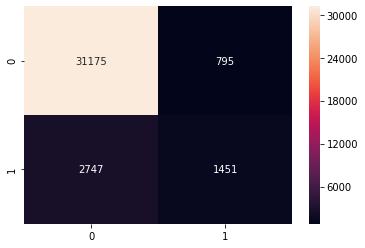

In [480]:
acc, df_cross, prec, rec, f1 = fit_ml_algo(LogisticRegression(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(df_cross, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)

Accuracy:  89.92
Precision:  0.631031220435194
Recall:  0.317770366841353
F1 Score:  0.42268694550063374


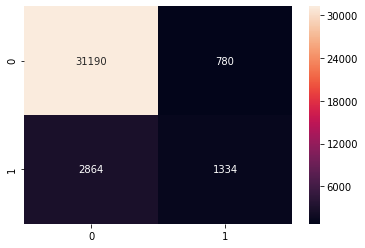

In [481]:
acc, df_cross, prec, rec, f1 = fit_ml_algo(RandomForestClassifier(n_estimators=10), X_train, y_train, X_test, y_test)
ax = sns.heatmap(df_cross, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)

**Model: Logistic Regression**

In [482]:
acc, df_corr, cross = fit_ml_algo(RandomForestClassifier(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(df_corr, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ValueError: too many values to unpack (expected 3)

**Model: RandomForestClassifier**

In [ ]:
acc, df_corr, cross = fit_ml_algo(RandomForestClassifier(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(df_corr, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
y_test.value_counts(normalize=True)